<a href="https://colab.research.google.com/github/rahatarinasir/Dayche/blob/master/Decision_Tree_Regression_AutoMPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


In [ ]:


data = pd.read_csv('C:/Users/ME/mpg.csv',sep='\s+',header=None,names=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin","NAME"])
data.dropna(inplace=True)
data = data.drop(columns=["NAME"])
X = data.drop(columns=['MPG'], inplace=False).values
y = data['MPG'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
scaler_X = MinMaxScaler().fit(X_train)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1, 1))
X_train, X_test = scaler_X.transform(X_train), scaler_X.transform(X_test)
y_train, y_test = scaler_y.transform(y_train.reshape(-1, 1)), scaler_y.transform(y_test.reshape(-1, 1))

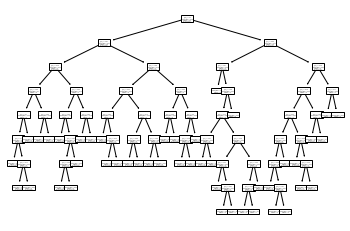

In [ ]:
model = DecisionTreeRegressor(criterion = 'friedman_mse',splitter='best',min_samples_split=10,min_samples_leaf=5)
model.fit(X_train, y_train)
b=tree.plot_tree(model)
plt.show()

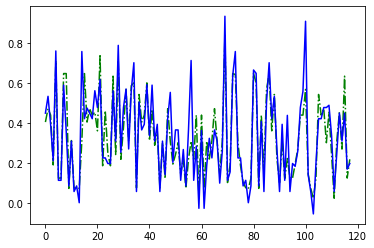

In [ ]:
y_pre = model.predict(X_test)
plt.plot(y_pre, 'g-.')
plt.plot(y_test, 'b')

In [ ]:
index = model.feature_importances_
index

array([0.63393576, 0.05055381, 0.00400685, 0.14455743, 0.04115076,
       0.12286433, 0.00293105])

[Text(179.1703125, 205.35999999999999, 'X[0] <= 0.3\nfriedman_mse = 0.048\nsamples = 274\nvalue = 0.356'),
 Text(96.12421875, 181.2, 'X[3] <= 0.167\nfriedman_mse = 0.027\nsamples = 145\nvalue = 0.515'),
 Text(47.081250000000004, 157.04, 'X[5] <= 0.625\nfriedman_mse = 0.021\nsamples = 69\nvalue = 0.615'),
 Text(26.15625, 132.88, 'X[3] <= 0.135\nfriedman_mse = 0.01\nsamples = 32\nvalue = 0.513'),
 Text(15.693750000000001, 108.72, 'X[4] <= 0.67\nfriedman_mse = 0.006\nsamples = 22\nvalue = 0.553'),
 Text(10.4625, 84.56, 'X[4] <= 0.5\nfriedman_mse = 0.003\nsamples = 16\nvalue = 0.585'),
 Text(5.23125, 60.400000000000006, 'friedman_mse = 0.002\nsamples = 6\nvalue = 0.543'),
 Text(15.693750000000001, 60.400000000000006, 'X[3] <= 0.077\nfriedman_mse = 0.002\nsamples = 10\nvalue = 0.611'),
 Text(10.4625, 36.24000000000001, 'friedman_mse = 0.002\nsamples = 5\nvalue = 0.635'),
 Text(20.925, 36.24000000000001, 'friedman_mse = 0.001\nsamples = 5\nvalue = 0.587'),
 Text(20.925, 84.56, 'friedman_mse 

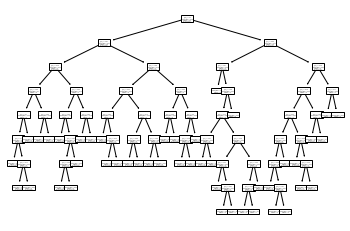

In [ ]:
tree.plot_tree(model)

In [ ]:
text_representation = tree.export_text(model)
print(text_representation)


|--- feature_0 <= 0.30
|   |--- feature_3 <= 0.17
|   |   |--- feature_5 <= 0.62
|   |   |   |--- feature_3 <= 0.13
|   |   |   |   |--- feature_4 <= 0.67
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- value: [0.54]
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_3 <= 0.08
|   |   |   |   |   |   |   |--- value: [0.63]
|   |   |   |   |   |   |--- feature_3 >  0.08
|   |   |   |   |   |   |   |--- value: [0.59]
|   |   |   |   |--- feature_4 >  0.67
|   |   |   |   |   |--- value: [0.47]
|   |   |   |--- feature_3 >  0.13
|   |   |   |   |--- feature_3 <= 0.15
|   |   |   |   |   |--- value: [0.38]
|   |   |   |   |--- feature_3 >  0.15
|   |   |   |   |   |--- value: [0.47]
|   |   |--- feature_5 >  0.62
|   |   |   |--- feature_4 <= 0.59
|   |   |   |   |--- feature_4 <= 0.40
|   |   |   |   |   |--- value: [0.74]
|   |   |   |   |--- feature_4 >  0.40
|   |   |   |   |   |--- feature_2 <= 0.12
|   |   |   |   |   |   |--- feat

In [ ]:
fig = plt.figure(figsize=(100,100),clear=True,dpi=100,num=100)
tree.plot_tree(model, feature_names=index, filled=True)


[Text(4147.4609375, 7130.555555555556, '0.6339357621425536 <= 0.3\nfriedman_mse = 0.048\nsamples = 274\nvalue = 0.356'),
 Text(2225.09765625, 6291.666666666666, '0.14455743279553449 <= 0.167\nfriedman_mse = 0.027\nsamples = 145\nvalue = 0.515'),
 Text(1089.84375, 5452.777777777777, '0.1228643328138715 <= 0.625\nfriedman_mse = 0.021\nsamples = 69\nvalue = 0.615'),
 Text(605.46875, 4613.888888888889, '0.14455743279553449 <= 0.135\nfriedman_mse = 0.01\nsamples = 32\nvalue = 0.513'),
 Text(363.28125, 3775.0, '0.04115075689107958 <= 0.67\nfriedman_mse = 0.006\nsamples = 22\nvalue = 0.553'),
 Text(242.1875, 2936.1111111111113, '0.04115075689107958 <= 0.5\nfriedman_mse = 0.003\nsamples = 16\nvalue = 0.585'),
 Text(121.09375, 2097.2222222222217, 'friedman_mse = 0.002\nsamples = 6\nvalue = 0.543'),
 Text(363.28125, 2097.2222222222217, '0.14455743279553449 <= 0.077\nfriedman_mse = 0.002\nsamples = 10\nvalue = 0.611'),
 Text(242.1875, 1258.333333333333, 'friedman_mse = 0.002\nsamples = 5\nvalue =

In [ ]:
pip install graphviz --user

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(b, out_file=None,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


TypeError: digraph {
} is not an estimator instance.

In [ ]:

from  graphviz import Digraph
b = Digraph(filename='C:/Users/ME/Desktop/code/tmp.gv', format='png')
b.save()

'C:/Users/ME/Desktop/code/tmp.gv'

In [ ]:
global dot
 
dot = Digraph(name = 'C:/Users/ME/Desktop/code/tmp.gv')
dot.format = 'png'

dot.view()

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng', '-O', 'tmp.gv.gv'], make sure the Graphviz executables are on your systems' PATH